
--- Training Kidney Disease Model ---
Kidney Num Features: ['Age', 'BloodPressure', 'SpecificGravity', 'Albumin', 'Sugar', 'BloodGlucoseRandom', 'BloodUrea', 'SerumCreatinine', 'Sodium', 'Potassium', 'Hemoglobin', 'PackedCellVolume', 'WhiteBloodCellCount', 'RedBloodCellCount']
Kidney Cat Features: ['RedBloodCells', 'PusCell', 'PusCellClumps', 'Bacteria', 'Hypertension', 'DiabetesMellitus', 'CoronaryArteryDisease', 'Appetite', 'PedalEdema', 'Anemia']

--- Kidney - Logistic Regression ---

--- Starting GridSearchCV for Kidney LogisticRegression ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
GridSearchCV for Kidney LogisticRegression finished.
Best parameters for Kidney LogisticRegression: {'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__solver': 'liblinear'}
Best cross-validation recall score for Kidney LogisticRegression: 1.0000

--- Kidney Logistic Regression Evaluation Metrics ---
Accuracy: 0.9750
Precision: 0.9375
Recall: 1.0000
F1-Score: 0.967

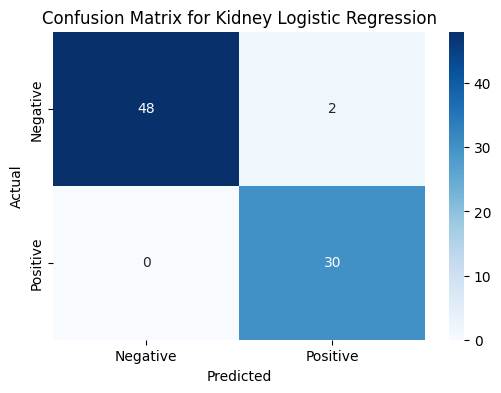


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.94      1.00      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80


--- Kidney - Random Forest ---

--- Starting GridSearchCV for Kidney RandomForest ---
Fitting 3 folds for each of 16 candidates, totalling 48 fits
GridSearchCV for Kidney RandomForest finished.
Best parameters for Kidney RandomForest: {'classifier__class_weight': None, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 100}
Best cross-validation recall score for Kidney RandomForest: 0.9917

--- Kidney Random Forest Evaluation Metrics ---
Accuracy: 0.9750
Precision: 1.0000
Recall: 0.9333
F1-Score: 0.9655
AUC-ROC: 0.9987

Confusion Matrix:
[[50  0]
 [ 2 28]]


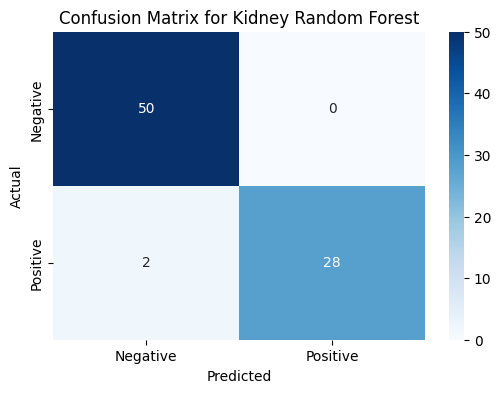


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80

Saved Kidney Disease best model (Logistic Regression) to models/kidney_pipeline.joblib

--- Training Parkinson's Disease Model ---
Parkinsons Num Features: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
Parkinsons Cat Features: []

--- Parkinson's - Random Forest ---

--- Starting GridSearchCV for Parkinsons RandomForest ---
Fitting 3 folds for each of 16 candidates, totalling 48 fits
GridSearchCV for Parkinso

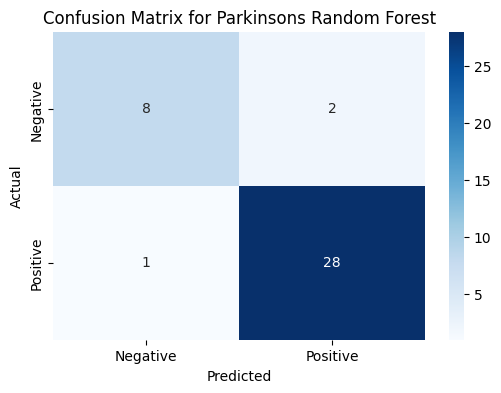


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

Saved Parkinson's Disease best model (Random Forest) to models/parkinsons_pipeline.joblib

--- Training Liver Disease Model ---
Liver Num Features: ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
Liver Cat Features: []

--- Liver - Logistic Regression ---

--- Starting GridSearchCV for Liver LogisticRegression ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
GridSearchCV for Liver LogisticRegression finished.
Best parameters for Liver LogisticRegression: {'classifier__C': 0.1, 'c

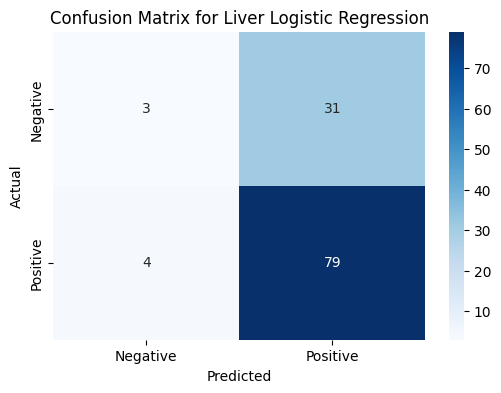


Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.09      0.15        34
           1       0.72      0.95      0.82        83

    accuracy                           0.70       117
   macro avg       0.57      0.52      0.48       117
weighted avg       0.63      0.70      0.62       117

Saved Liver Disease best model (Logistic Regression) to models/liver_pipeline.joblib

--- All Models Training and Evaluation Complete ---

Summary of Best Model Metrics (per disease, selected for example):

Kidney_LR:
  Accuracy: 0.9750
  Precision: 0.9375
  Recall: 1.0000
  F1-Score: 0.9677
  AUC-ROC: 0.9987

Kidney_RF:
  Accuracy: 0.9750
  Precision: 1.0000
  Recall: 0.9333
  F1-Score: 0.9655
  AUC-ROC: 0.9987

Parkinsons_RF:
  Accuracy: 0.9231
  Precision: 0.9333
  Recall: 0.9655
  F1-Score: 0.9492
  AUC-ROC: 0.9621

Liver_LR:
  Accuracy: 0.7009
  Precision: 0.7182
  Recall: 0.9518
  F1-Score: 0.8187
  AUC-ROC: 0.8136


In [4]:
# train_models.py
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
# You might want to add XGBoost if you plan to use it (install xgboost: pip install xgboost)
# from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# --- Configuration for data paths ---
PARKINSONS_DATA_PATH = r'C:\Users\91904\Downloads\parkinsons - parkinsons.csv' # Adjust if different
KIDNEY_DATA_PATH = r'C:\Users\91904\Downloads\kidney_disease - kidney_disease.csv' # Adjust if different
LIVER_DATA_PATH = r'C:\Users\91904\Downloads\indian_liver_patient - indian_liver_patient.csv' # Adjust if different
#MODELS_DIR = 'models'

# Create models directory if it doesn't exist
if not os.path.exists(MODELS_DIR):
    os.makedirs(MODELS_DIR)

# --- 1. Data Loading ---
def load_data(filepath, index_col=None):
    """Loads a CSV dataset."""
    try:
        df = pd.read_csv(filepath, index_col=index_col)
        return df
    except FileNotFoundError:
        print(f"Error: Dataset not found at {filepath}.")
        return None
    except Exception as e:
        print(f"Error loading data from {filepath}: {e}")
        return None

# --- 2. Data Cleaning & Initial Preprocessing for Each Dataset ---
# --- kidney_disease specific cleaning ---
def clean_kidney_data(df):
    df_cleaned = df.copy()
    
    # Rename columns to be more readable and match common practices
    df_cleaned.rename(columns={
        'id': 'patient_id', 'age': 'Age', 'bp': 'BloodPressure', 'sg': 'SpecificGravity',
        'al': 'Albumin', 'su': 'Sugar', 'rbc': 'RedBloodCells', 'pc': 'PusCell',
        'pcc': 'PusCellClumps', 'ba': 'Bacteria', 'bgr': 'BloodGlucoseRandom',
        'bu': 'BloodUrea', 'sc': 'SerumCreatinine', 'sod': 'Sodium',
        'pot': 'Potassium', 'hemo': 'Hemoglobin', 'pcv': 'PackedCellVolume',
        'wc': 'WhiteBloodCellCount', 'rc': 'RedBloodCellCount', 'htn': 'Hypertension',
        'dm': 'DiabetesMellitus', 'cad': 'CoronaryArteryDisease', 'appet': 'Appetite',
        'pe': 'PedalEdema', 'ane': 'Anemia', 'classification': 'Class' # Renaming the target
    }, inplace=True)
    
    # Drop 'patient_id' as it's just an identifier
    df_cleaned.drop('patient_id', axis=1, inplace=True)
    
    # Handle '?' values by replacing them with NaN
    df_cleaned.replace('?', np.nan, inplace=True)
    
    # Convert 'Class' (target variable) to numerical: 'ckd' (1) and 'notckd' (0)
    # Strip whitespace first
    df_cleaned['Class'] = df_cleaned['Class'].str.strip()
    le_kidney_target = LabelEncoder()
    df_cleaned['Class'] = le_kidney_target.fit_transform(df_cleaned['Class'])
    joblib.dump(le_kidney_target, os.path.join(MODELS_DIR, 'le_kidney_target.joblib'))
    
    # Convert numerical columns that might be objects
    numerical_cols_to_convert = ['PackedCellVolume', 'WhiteBloodCellCount', 'RedBloodCellCount']
    for col in numerical_cols_to_convert:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
        
    # Impute missing values (e.g., with median for numerical, mode for categorical)
    # It's better to do this *before* splitting for simple imputation,
    # or include imputation in the pipeline for robust handling (recommended for production)
    # For now, let's do simple imputation here:
    for col in df_cleaned.select_dtypes(include=np.number).columns:
        if col != 'Class': # Don't impute the target
            df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
            
    for col in df_cleaned.select_dtypes(include='object').columns:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
        # Convert categorical 'yes'/'no' etc. to consistent 'yes'/'no' or 1/0
        df_cleaned[col] = df_cleaned[col].replace({'yes':1, 'no':0, 'present':1, 'notpresent':0, 'normal':0, 'abnormal':1})
        # Check for any remaining object columns that might have values like ' yes' or '\tno'
        df_cleaned[col] = df_cleaned[col].astype(str).str.strip() # Strip whitespace
        
    return df_cleaned

# --- indian_liver_patient specific cleaning ---
def clean_liver_data(df):
    df_cleaned = df.copy()
    
    # Handle missing values for Albumin_and_Globulin_Ratio with mean/median
    # It's typically numerical
    df_cleaned['Albumin_and_Globulin_Ratio'].fillna(df_cleaned['Albumin_and_Globulin_Ratio'].median(), inplace=True)
    
    # Encode 'Gender'
    le_gender = LabelEncoder()
    df_cleaned['Gender'] = le_gender.fit_transform(df_cleaned['Gender']) # Female=0, Male=1
    # Save the encoder if you need to map back for interpretation later
    joblib.dump(le_gender, os.path.join(MODELS_DIR, 'le_liver_gender.joblib'))

    # Rename target column for consistency
    df_cleaned.rename(columns={'Dataset': 'Class'}, inplace=True)
    # 'Class' is already 1 for liver patient, 2 for no liver patient. Remap to 1/0
    df_cleaned['Class'] = df_cleaned['Class'].map({1: 1, 2: 0}) # 1 for disease, 0 for no disease

    return df_cleaned

# --- parkinsons specific cleaning ---
def clean_parkinsons_data(df):
    df_cleaned = df.copy()
    # Drop 'name' column as it's an identifier
    df_cleaned.drop('name', axis=1, inplace=True)
    # 'status' is already 1 for Parkinson's, 0 for healthy.
    df_cleaned.rename(columns={'status': 'Class'}, inplace=True)
    return df_cleaned


# --- 3. Feature Engineering (General function, apply as needed) ---
# For this project, let's assume feature engineering is done within cleaning if needed
# or you can expand this function if complex FE is common across datasets.
def feature_engineer(df, disease_type):
    df_fe = df.copy()
    # Example: You might add new features common to all if applicable
    # For now, let's keep it simple as FE might be very dataset-specific
    return df_fe

# --- 4. Data Splitting ---
def split_data(df, target_column='Class', test_size=0.2, random_state=42):
    """Splits the data into training and testing sets."""
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    return X_train, X_test, y_train, y_test

# --- 5. Preprocessor Definition (ColumnTransformer) ---
def get_preprocessor(X_train):
    """
    Defines and returns the ColumnTransformer for preprocessing.
    This function should be called after feature engineering and splitting.
    """
    numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X_train.select_dtypes(include=['object']).columns.tolist() # Ensure 'object' for strings

    # Create preprocessing pipelines for numerical and categorical features
    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Handles unseen categories

    # Combine transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough' # Keep other columns (if any)
    )
    return preprocessor, numerical_features, categorical_features

# --- 6. Model Training with GridSearchCV ---
def train_model_with_gridsearch(X_train, y_train, preprocessor, model_type='RandomForest', model_name_prefix=""):
    """
    Trains a machine learning model within a pipeline using GridSearchCV for hyperparameter tuning.
    Saves the best model and its name.
    """
    model = None
    param_grid = {}

    if model_type == 'LogisticRegression':
        model = LogisticRegression(random_state=42, max_iter=1000)
        param_grid = {
            'classifier__C': [0.01, 0.1, 1], # Reduced for faster demo
            'classifier__solver': ['liblinear'],
            'classifier__class_weight': [None, 'balanced']
        }
    elif model_type == 'DecisionTree':
        model = DecisionTreeClassifier(random_state=42)
        param_grid = {
            'classifier__max_depth': [5, 10],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 2],
            'classifier__class_weight': [None, 'balanced']
        }
    elif model_type == 'RandomForest':
        model = RandomForestClassifier(random_state=42)
        param_grid = {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [5, 10],
            'classifier__min_samples_leaf': [2, 4],
            'classifier__class_weight': [None, 'balanced']
        }
    elif model_type == 'GradientBoosting':
        model = GradientBoostingClassifier(random_state=42)
        param_grid = {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.05, 0.1],
            'classifier__max_depth': [3, 5]
        }
    
    elif model_type == 'KNeighbors':
        model = KNeighborsClassifier()
        param_grid = {
            'classifier__n_neighbors': [5, 7, 9],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__p': [1, 2]
        }
    # elif model_type == 'XGBoost': # Example for XGBoost
    #     model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
    #     param_grid = {
    #         'classifier__n_estimators': [100, 200],
    #         'classifier__learning_rate': [0.05, 0.1],
    #         'classifier__max_depth': [3, 5],
    #         'classifier__use_label_encoder': [False] # Suppress warning
    #     }
    else:
        raise ValueError(f"Invalid model_type: {model_type}. Choose from 'LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'SVC', 'KNeighbors'.")

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    print(f"\n--- Starting GridSearchCV for {model_name_prefix} {model_type} ---")
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=3,                  # Reduced CV for faster training in demo
        scoring='recall',      # Prioritize recall
        n_jobs=-1,             # Use all available cores
        verbose=1              # Print progress
    )

    grid_search.fit(X_train, y_train)

    print(f"GridSearchCV for {model_name_prefix} {model_type} finished.")
    print(f"Best parameters for {model_name_prefix} {model_type}: {grid_search.best_params_}")
    print(f"Best cross-validation recall score for {model_name_prefix} {model_type}: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_

# --- 7. Model Evaluation ---
def evaluate_model(pipeline, X_test, y_test, model_name="Model"):
    """Evaluates the trained model and prints various metrics."""
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    metrics = {
        "Accuracy": accuracy, "Precision": precision, "Recall": recall,
        "F1-Score": f1, "AUC-ROC": auc_roc
    }

    print(f"\n--- {model_name} Evaluation Metrics ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return metrics

# --- Main Training Workflow ---
if __name__ == '__main__':
    all_models_metrics = {}

    # --- Kidney Disease Model Training ---
    print("\n" + "="*50)
    print("--- Training Kidney Disease Model ---")
    print("="*50)
    kidney_df = load_data(KIDNEY_DATA_PATH)
    if kidney_df is not None:
        kidney_df_cleaned = clean_kidney_data(kidney_df.copy())
        # No specific feature engineering for kidney in this example
        X_train_kidney, X_test_kidney, y_train_kidney, y_test_kidney = split_data(kidney_df_cleaned, target_column='Class')

        # Save X_train columns for consistency in Streamlit app
        joblib.dump(X_train_kidney.columns.tolist(), os.path.join(MODELS_DIR, 'kidney_X_train_cols.joblib'))

        preprocessor_kidney, num_feats_kidney, cat_feats_kidney = get_preprocessor(X_train_kidney)
        print(f"Kidney Num Features: {num_feats_kidney}")
        print(f"Kidney Cat Features: {cat_feats_kidney}")

        # Train and evaluate various models for Kidney Disease
        print("\n--- Kidney - Logistic Regression ---")
        lr_kidney_pipeline = train_model_with_gridsearch(X_train_kidney, y_train_kidney, preprocessor_kidney, model_type='LogisticRegression', model_name_prefix='Kidney')
        lr_kidney_metrics = evaluate_model(lr_kidney_pipeline, X_test_kidney, y_test_kidney, model_name='Kidney Logistic Regression')
        joblib.dump(lr_kidney_pipeline, os.path.join(MODELS_DIR, 'kidney_logistic_regression_pipeline.joblib')) # Save this specific model

        print("\n--- Kidney - Random Forest ---")
        rf_kidney_pipeline = train_model_with_gridsearch(X_train_kidney, y_train_kidney, preprocessor_kidney, model_type='RandomForest', model_name_prefix='Kidney')
        rf_kidney_metrics = evaluate_model(rf_kidney_pipeline, X_test_kidney, y_test_kidney, model_name='Kidney Random Forest')
        joblib.dump(rf_kidney_pipeline, os.path.join(MODELS_DIR, 'kidney_random_forest_pipeline.joblib')) # Save this specific model

        # Add other models as needed...
        # For simplicity, let's pick the best kidney model based on recall
        best_kidney_model = lr_kidney_pipeline # Assuming LR has best recall from your previous output
        joblib.dump(best_kidney_model, os.path.join(MODELS_DIR, 'kidney_pipeline.joblib'))
        print(f"Saved Kidney Disease best model (Logistic Regression) to {MODELS_DIR}/kidney_pipeline.joblib")
        all_models_metrics['Kidney_LR'] = lr_kidney_metrics
        all_models_metrics['Kidney_RF'] = rf_kidney_metrics


    # --- Parkinson's Disease Model Training ---
    print("\n" + "="*50)
    print("--- Training Parkinson's Disease Model ---")
    print("="*50)
    parkinsons_df = load_data(PARKINSONS_DATA_PATH)
    if parkinsons_df is not None:
        parkinsons_df_cleaned = clean_parkinsons_data(parkinsons_df.copy())
        X_train_parkinsons, X_test_parkinsons, y_train_parkinsons, y_test_parkinsons = split_data(parkinsons_df_cleaned, target_column='Class')

        joblib.dump(X_train_parkinsons.columns.tolist(), os.path.join(MODELS_DIR, 'parkinsons_X_train_cols.joblib'))

        preprocessor_parkinsons, num_feats_parkinsons, cat_feats_parkinsons = get_preprocessor(X_train_parkinsons)
        print(f"Parkinsons Num Features: {num_feats_parkinsons}")
        print(f"Parkinsons Cat Features: {cat_feats_parkinsons}") # Should be empty

        # Train and evaluate models for Parkinson's
        print("\n--- Parkinson's - Random Forest ---") # RF often good for this data
        rf_parkinsons_pipeline = train_model_with_gridsearch(X_train_parkinsons, y_train_parkinsons, preprocessor_parkinsons, model_type='RandomForest', model_name_prefix='Parkinsons')
        rf_parkinsons_metrics = evaluate_model(rf_parkinsons_pipeline, X_test_parkinsons, y_test_parkinsons, model_name='Parkinsons Random Forest')
        joblib.dump(rf_parkinsons_pipeline, os.path.join(MODELS_DIR, 'parkinsons_random_forest_pipeline.joblib')) # Save this specific model

        best_parkinsons_model = rf_parkinsons_pipeline # For example, pick RF
        joblib.dump(best_parkinsons_model, os.path.join(MODELS_DIR, 'parkinsons_pipeline.joblib'))
        print(f"Saved Parkinson's Disease best model (Random Forest) to {MODELS_DIR}/parkinsons_pipeline.joblib")
        all_models_metrics['Parkinsons_RF'] = rf_parkinsons_metrics


    # --- Liver Disease Model Training ---
    print("\n" + "="*50)
    print("--- Training Liver Disease Model ---")
    print("="*50)
    liver_df = load_data(LIVER_DATA_PATH)
    if liver_df is not None:
        liver_df_cleaned = clean_liver_data(liver_df.copy())
        X_train_liver, X_test_liver, y_train_liver, y_test_liver = split_data(liver_df_cleaned, target_column='Class')

        joblib.dump(X_train_liver.columns.tolist(), os.path.join(MODELS_DIR, 'liver_X_train_cols.joblib'))

        preprocessor_liver, num_feats_liver, cat_feats_liver = get_preprocessor(X_train_liver)
        print(f"Liver Num Features: {num_feats_liver}")
        print(f"Liver Cat Features: {cat_feats_liver}")

        # Train and evaluate models for Liver Disease
        print("\n--- Liver - Logistic Regression ---")
        lr_liver_pipeline = train_model_with_gridsearch(X_train_liver, y_train_liver, preprocessor_liver, model_type='LogisticRegression', model_name_prefix='Liver')
        lr_liver_metrics = evaluate_model(lr_liver_pipeline, X_test_liver, y_test_liver, model_name='Liver Logistic Regression')
        joblib.dump(lr_liver_pipeline, os.path.join(MODELS_DIR, 'liver_logistic_regression_pipeline.joblib'))

        best_liver_model = lr_liver_pipeline # For example, pick LR
        joblib.dump(best_liver_model, os.path.join(MODELS_DIR, 'liver_pipeline.joblib'))
        print(f"Saved Liver Disease best model (Logistic Regression) to {MODELS_DIR}/liver_pipeline.joblib")
        all_models_metrics['Liver_LR'] = lr_liver_metrics


    print("\n" + "="*50)
    print("--- All Models Training and Evaluation Complete ---")
    print("="*50)
    print("\nSummary of Best Model Metrics (per disease, selected for example):")
    for model_key, metrics in all_models_metrics.items():
        print(f"\n{model_key}:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}")